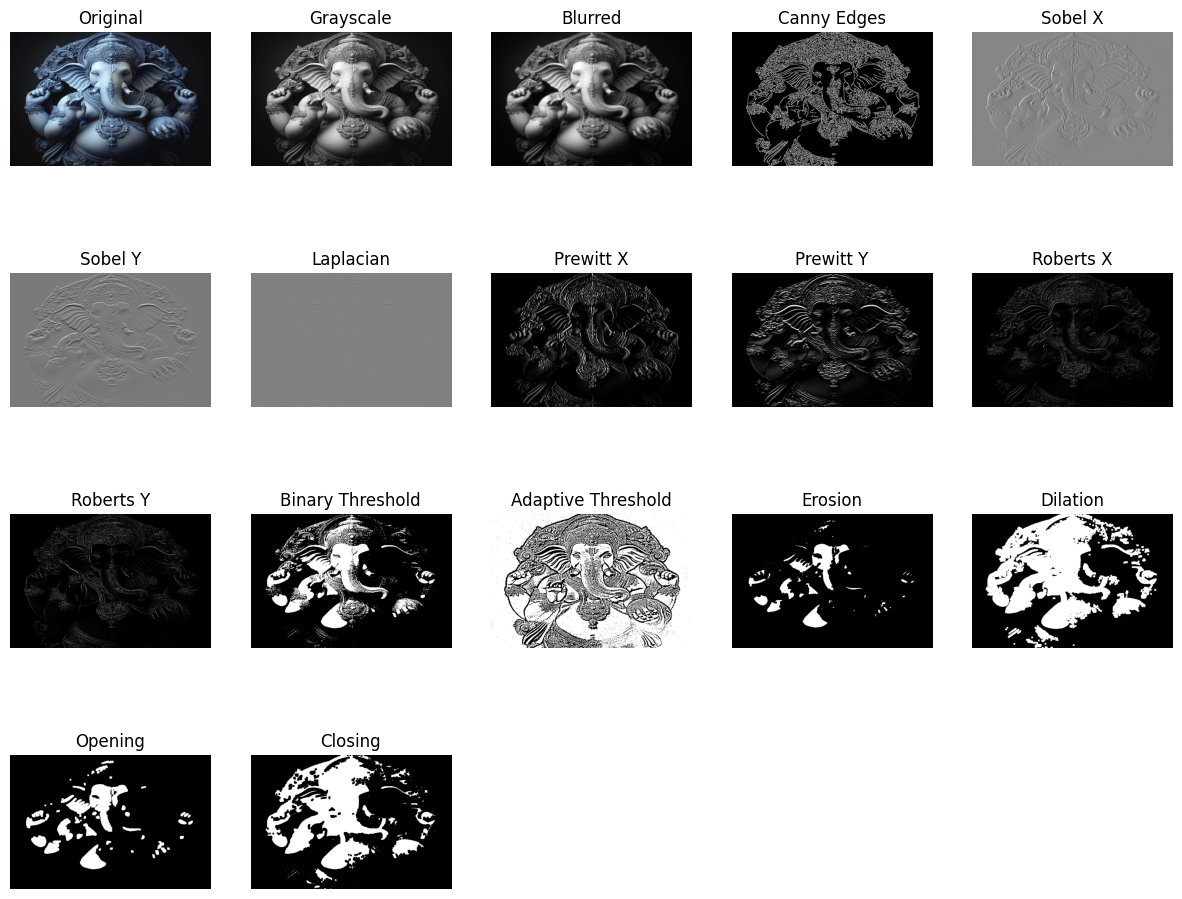

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/diksha.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (600, 400))  # Resize for better visualization

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Smoothing (Blurring)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge Detection
canny_edges = cv2.Canny(gray, 50, 150)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# Prewitt Operator
prewitt_x = cv2.filter2D(gray, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(gray, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))

# Roberts Operator
roberts_x = cv2.filter2D(gray, -1, np.array([[1, 0], [0, -1]], dtype=np.float32))
roberts_y = cv2.filter2D(gray, -1, np.array([[0, 1], [-1, 0]], dtype=np.float32))

# Thresholding
_, binary_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Morphological Operations
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(binary_thresh, kernel, iterations=1)
dilation = cv2.dilate(binary_thresh, kernel, iterations=1)
opening = cv2.morphologyEx(binary_thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_thresh, cv2.MORPH_CLOSE, kernel)

# Display results
titles = ["Original", "Grayscale", "Blurred", "Canny Edges", "Sobel X", "Sobel Y",
          "Laplacian", "Prewitt X", "Prewitt Y", "Roberts X", "Roberts Y",
          "Binary Threshold", "Adaptive Threshold", "Erosion", "Dilation", "Opening", "Closing"]

images = [image, gray, blurred, canny_edges, sobel_x, sobel_y, laplacian,
          prewitt_x, prewitt_y, roberts_x, roberts_y,
          binary_thresh, adaptive_thresh, erosion, dilation, opening, closing]

plt.figure(figsize=(15, 12))
for i in range(len(images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()
